In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats as st
import itertools as it
from tqdm import tqdm_notebook as tqdm
from matplotlib.animation import FuncAnimation
import random
import modelutils
plt.ion()

In [2]:
npeople=50
ndays=20
locations=['Broad','Moore','Watson','Beckman','Noyes','Braun','Schlinger','Kerckhoff','Spalding','Chandler']

### Main Simulation

In [3]:
agent_locations,agent_states = modelutils.run_simulation(ndays,npeople,locations,testsperday=999)
agent_locations_nolunch,agent_states_nolunch = modelutils.run_simulation(ndays,npeople,locations,testsperday=0)  #the simulation will never hit this counter value

Day:  19 / 20


Day:  19 / 20


Visualization and animation code below.

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


ValueError: None is not in list

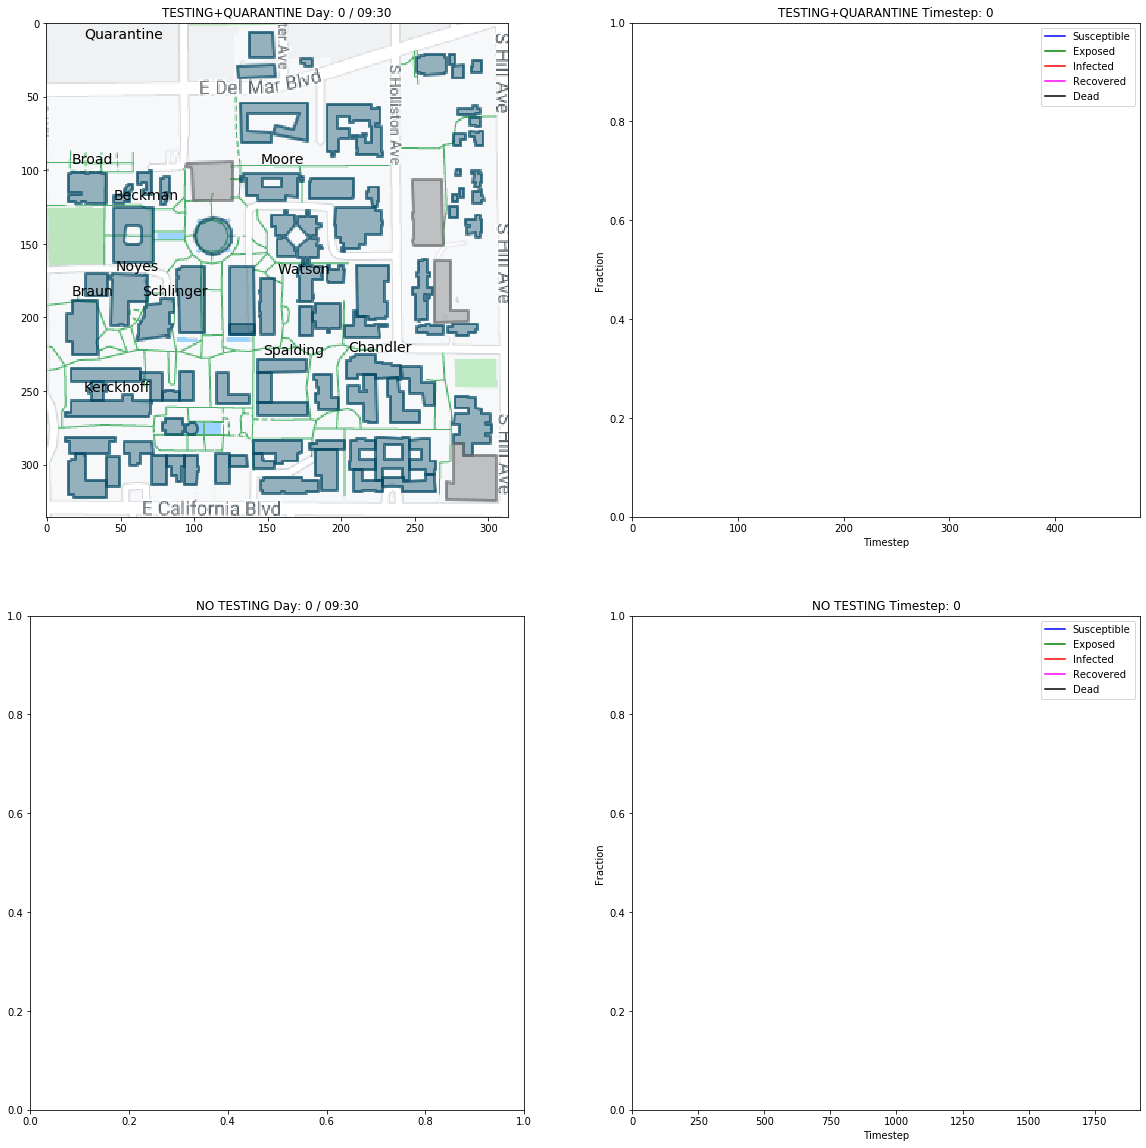

In [4]:
def num2titlestr(n):
    day = n//96
    day_rem = n % 96
    hours = day_rem // 12
    
    fmt_hours = 9 + hours
    if fmt_hours>12:
        fmt_hours+=-12
    fmt_hours= str(fmt_hours)
    if len(fmt_hours)!=2:
        fmt_hours = '0'+fmt_hours
    
    hour_rem = day_rem % 12
    minutes = hour_rem * 5
    fmt_minutes = str(minutes)
    if len(fmt_minutes) != 2:
        fmt_minutes = '0'+fmt_minutes
    return 'Day: '+str(day)+' / '+ fmt_hours+':'+fmt_minutes


fig,ax = plt.subplots(nrows=2,ncols=2,figsize=[20,20])
skip=6

state_counts = np.zeros(shape=[agent_locations.shape[0],5]) #s,e,i,r,d in that order
state_counts_nolunch = np.zeros(shape=[agent_locations.shape[0],5])

ax[0,1].set_xlabel('Timestep')
ax[0,1].set_ylabel('Fraction')
ax[1,1].set_xlabel('Timestep')
ax[1,1].set_ylabel('Fraction')


plot_colors=['blue','green','red','magenta','black']

def update(i,skip=skip):
    print('Step: ',i,' / ',agent_locations.shape[0],end='\r')
    
        
    plot_indices = np.arange(0,i,step=skip)
        
    ax[0,0].clear()
    ax[0,0].set_title('TESTING+QUARANTINE '+num2titlestr(i))
    ax[1,0].clear()
    ax[1,0].set_title('NO TESTING '+num2titlestr(i)) 
    
    
    disease_states = np.squeeze(agent_states[i,:,:])  #we need to "compress this one hot matrix (one hot along columns)"
    disease_states = np.array([np.where(disease_states[:,x]==1)[0] for x in range(disease_states.shape[1])])
    
    disease_states_nolunch = np.squeeze(agent_states_nolunch[i,:,:])  #we need to "compress this one hot matrix (one hot along columns)"
    disease_states_nolunch = np.array([np.where(disease_states_nolunch[:,x]==1)[0] for x in range(disease_states_nolunch.shape[1])])
    
    for idx in range(disease_states.size):
        current_state = disease_states[idx]

        if current_state<=2:
            state_counts[i,0]+=1

        elif current_state>2 and current_state <=5:
            state_counts[i,1]+=1

        elif current_state>5 and current_state<=8:
            state_counts[i,2]+=1

        elif current_state==9:
            state_counts[i,3]+=1

        elif current_state==10:
            state_counts[i,4]+=1
            
            
    
    
    for idx in range(disease_states.size):
        current_state = disease_states_nolunch[idx]

        if current_state<=2:
            state_counts_nolunch[i,0]+=1

        elif current_state>2 and current_state <=5:
            state_counts_nolunch[i,1]+=1

        elif current_state>5 and current_state<=8:
            state_counts_nolunch[i,2]+=1

        elif current_state==9:
            state_counts_nolunch[i,3]+=1

        elif current_state==10:
            state_counts_nolunch[i,4]+=1
            
            
    state_counts[i,:] /=     npeople
    state_counts_nolunch[i,:] /=     npeople

    modelutils.draw_campus(agent_locations[i,:],disease_states,ax[0,0])
    modelutils.draw_campus(agent_locations_nolunch[i,:],disease_states,ax[1,0])
    
    ax[0,0].axis('off')
    ax[1,0].axis('off')
    
    for plot_idx in range(5):
        ax[0,1].plot(plot_indices,state_counts[plot_indices,plot_idx],color=plot_colors[plot_idx])
        ax[1,1].plot(plot_indices,state_counts_nolunch[plot_indices,plot_idx],color=plot_colors[plot_idx])
        
    ax[0,1].set_title('TESTING+QUARANTINE Timestep: '+str(i))
    ax[0,1].set_ylim([0,1])
    ax[0,1].set_xlim([0,480])
    ax[0,1].legend(['Susceptible','Exposed','Infected','Recovered','Dead'])
    
    ax[1,1].set_title('NO TESTING Timestep: '+str(i))
    ax[1,1].set_ylim([0,1])
    ax[1,1].set_xlim([0,480*4])
    ax[1,1].legend(['Susceptible','Exposed','Infected','Recovered','Dead'])
    


anim = FuncAnimation(fig, update, frames=np.arange(0, agent_locations.shape[0],skip), interval=200,repeat_delay=1000)

anim.save('200701_FIXING.gif', dpi=80, writer='imagemagick')
print('GIF Finished!')